In [41]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb

In [53]:
df = pd.read_csv('cc_state_sector_grads.csv')

In [54]:
df.head()

,index,stateid,state,state_abbr,control,level,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,grad_cohort_ct
0,0,1,Alabama,AL,Private for-profit,4-year,2011,B,A,4y bach,0,0.0,0,NaN,NaN,9
1,1,1,Alabama,AL,Private for-profit,4-year,2011,B,Ai,4y bach,1,0.0,0,0.0,0.0,9
2,2,1,Alabama,AL,Private for-profit,4-year,2011,B,B,4y bach,51,2.0,3,3.9,5.9,9
3,3,1,Alabama,AL,Private for-profit,4-year,2011,B,H,4y bach,1,0.0,0,0.0,0.0,9
4,4,1,Alabama,AL,Private for-profit,4-year,2011,B,W,4y bach,66,15.0,18,22.7,27.3,9


In [55]:
df.gender = df.gender.map({'M': 0, 'B': 1})
df.state = df.state.map({'United States': 0, 'Alabama': 1})

In [56]:
df.drop('state', axis=1, inplace=True)
df.drop('state_abbr', axis=1, inplace=True)
df.drop('control', axis=1, inplace=True)
df.drop('level', axis=1, inplace=True)
df.drop('race', axis=1, inplace=True)
df.drop('cohort', axis=1, inplace=True)
df.dropna(axis=1, inplace=True)

In [57]:
df.describe()

,index,stateid,year,grad_cohort,grad_150,grad_cohort_ct
count,84942.00000,84942.000000,84942.000000,84942.000000,84942.000000,84942.000000
mean,42470.50000,28.179699,2007.565162,2308.136658,1058.684703,23.215512
std,24520.78762,15.901155,3.489043,19414.099744,9753.837421,92.582082
min,0.00000,0.000000,2002.000000,0.000000,0.000000,1.000000
25%,21235.25000,16.000000,2005.000000,6.000000,2.000000,3.000000
50%,42470.50000,28.000000,2008.000000,64.000000,20.000000,7.000000
75%,63705.75000,41.000000,2011.000000,561.000000,207.000000,16.000000
max,84941.00000,56.000000,2013.000000,891211.000000,513263.000000,1180.000000


In [58]:
df['year'] = df['year'].fillna(df['year'].mean())

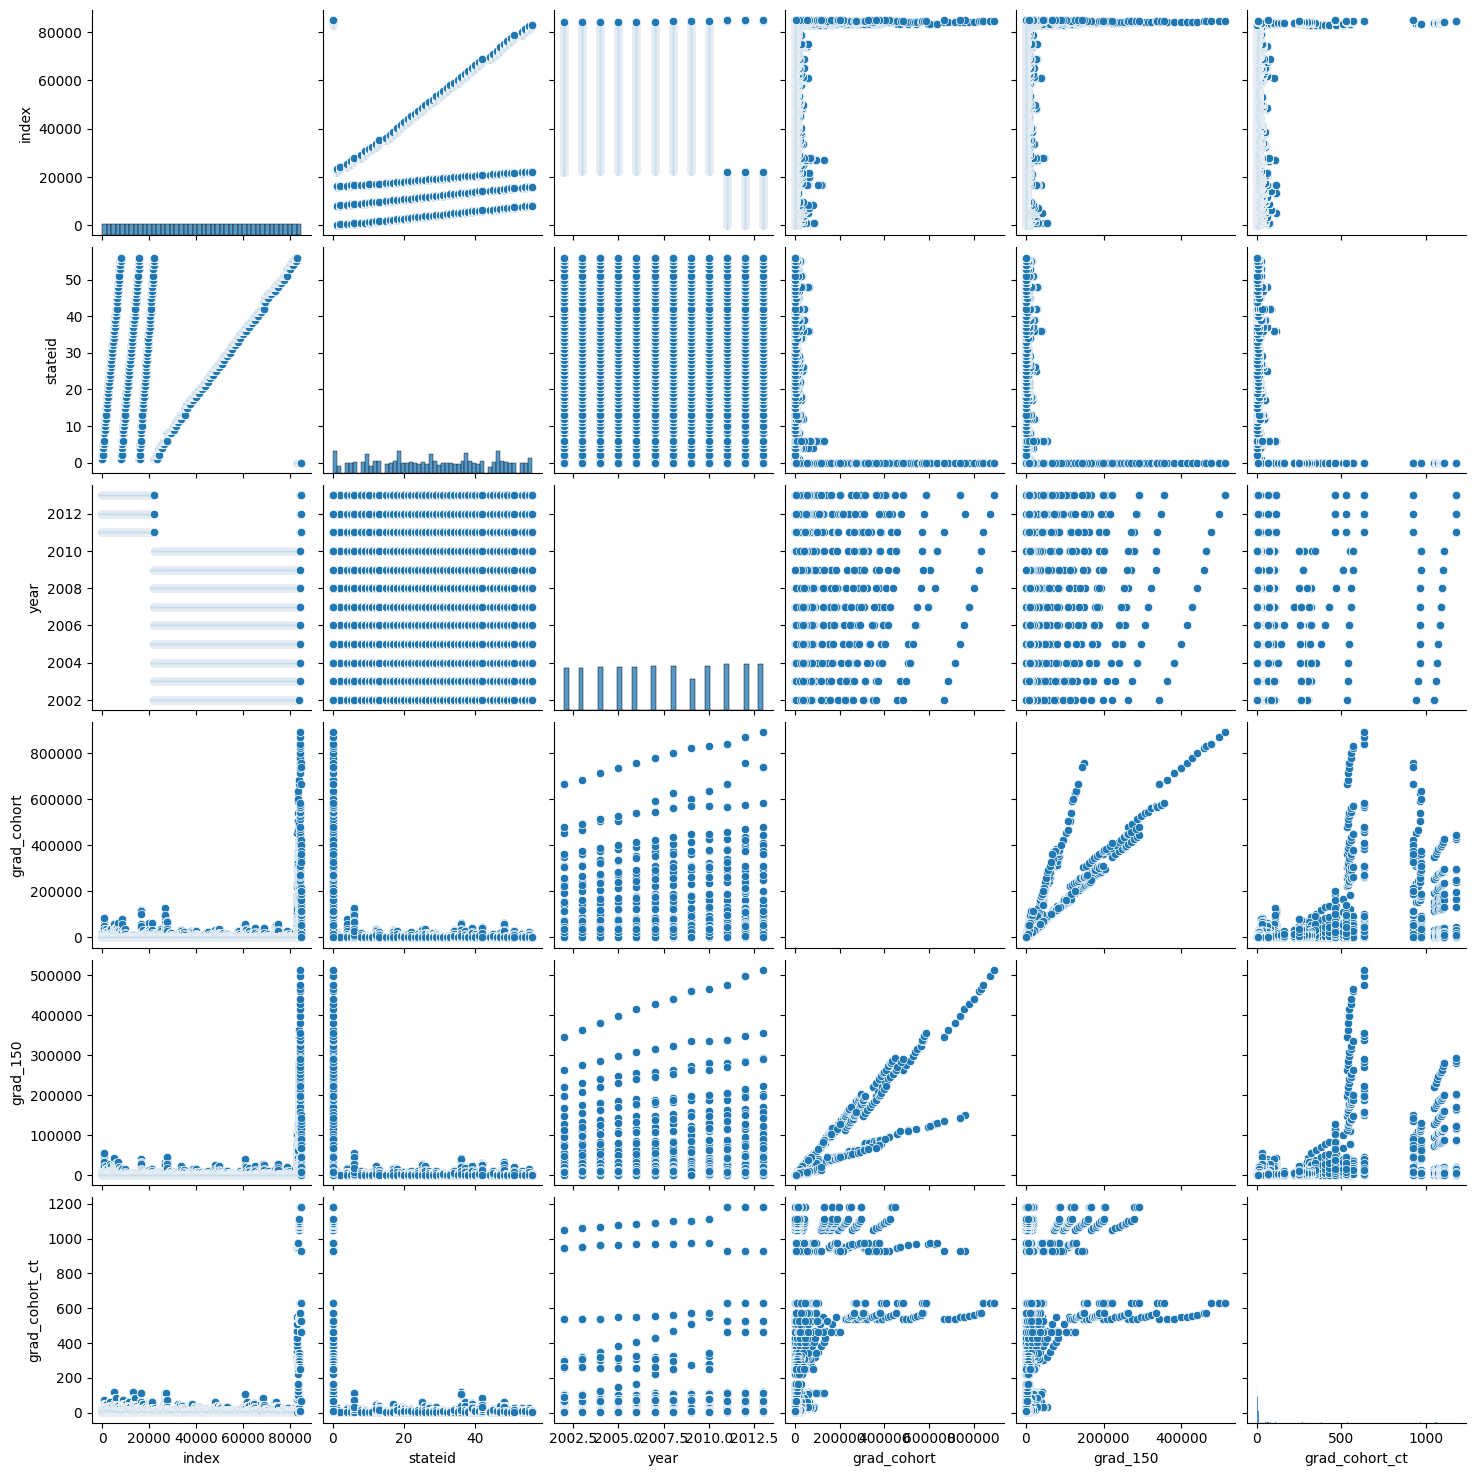

In [59]:
sb.pairplot(df)

In [60]:
data_x = df.drop(['stateid', 'grad_cohort', 'year','grad_cohort_ct'], axis='columns')
data_y = df.grad_150

In [61]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [62]:
decission_tree = tree.DecisionTreeClassifier()

In [63]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [64]:
print(f'Score: {round(decission_tree.score(test_x, test_y), 4) * 100.0}%')

Score: 94.53%
